<a href="https://colab.research.google.com/github/khakhiD/ML/blob/main/classification_tutorials/classification_keras_sequential_tutoral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 합성곱 신경망
* 미니 프로젝트 B2 얼굴 찾기 : CNN 활용

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize

In [27]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'
face_images = []

for i in range(15):
  file = url + 'img{0:02d}.jpg'.format(i+1)
  img = imread(file)
  img = resize(img, (128,128))
  face_images.append(img)

<Figure size 432x288 with 0 Axes>

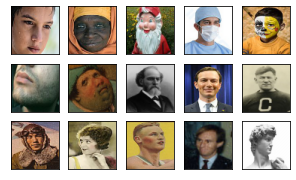

In [18]:
def plot_images(nRow, nCol, img):
    # figure()은 Figure 인스턴스를 생성하여 이미지 전체의 영역을 확보하는 것 - 원형 <figure(figsize=(w,h), dpi=, facecolor=, edgecolor=)
    fig = plt.figure()
    # subplot() => 인수에 행의 수, 열의 수 및 몇 번째 등을 지정할 수 있다.
    # subplots() => fig와 axes 혹은 axes 객체 배열을 반환한다.
    # axes는 그래프의 이미지, 축의 메모리, 라벨의 설정 등을 맡고 있다.
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))

    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

# 이미지 여러개 띄워주는 plot_images 함수 작성
plot_images(3,5, face_images) # 3행 5열로 이미지 띄우기

<Figure size 432x288 with 0 Axes>

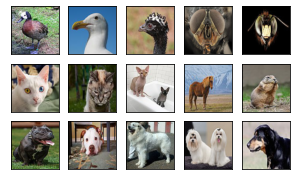

In [28]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'
animal_images = []

for i in range(15):
  file = url + 'img{0:02d}.jpg'.format(i+1)
  img = imread(file)
  img = resize(img, (128,128))
  animal_images.append(img)

plot_images(3,5, animal_images)

In [33]:
X = face_images + animal_images # 두 배열을 합
y = [ [1,0] ]* len(face_images) + [ [0,1]] * len(animal_images)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(30, 128, 128, 3) (30, 2)


In [32]:
# 텐서플로우 - 케라스 Squential 모델 활용
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([keras.layers.Conv2D(input_shape = (128,128,3), kernel_size = (3,3), filters = 32),
                                 keras.layers.MaxPooling2D((2,2), strides = 2),
                                 keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
                                 keras.layers.MaxPooling2D((2,2), strides = 2),
                                 keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
                                 keras.layers.MaxPooling2D((2,2), strides = 2),
                                 keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation = 'relu'), # Dense 레이어는 뉴런의 입출력을 연결해주는 역할을 한다.
                                 keras.layers.Dense(16, activation = 'relu'), # ex. Dense(8, input_dim=4, kernel_initializer='uniform', activation='relu')
                                 keras.layers.Dense(2, activation = 'softmax'), # 뉴런의 수, 가중치 초기화 방법(uniform or normal), 활성화 함수
                                 ])

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.6990 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 1s 522ms/step - loss: 0.7572 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 1s 522ms/step - loss: 0.7115 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 1s 518ms/step - loss: 0.8471 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 1s 520ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 1s 522ms/step - loss: 0.6780 - accuracy: 0.5667
Epoch 7/100
1/1 [==============================] - 1s 521ms/step - loss: 0.6521 - accuracy: 0.6667
Epoch 8/100
1/1 [==============================] - 1s 517ms/step - loss: 0.6289 - accuracy: 0.5667
Epoch 9/100
1/1 [==============================] - 1s 514ms/step - loss: 0.5955 - accuracy: 0.7667
Epoch 10/100
1/1 [==============================] - 1s 503ms/step - loss: 0.5552 - accuracy: 0.7333
Epoch 11/100

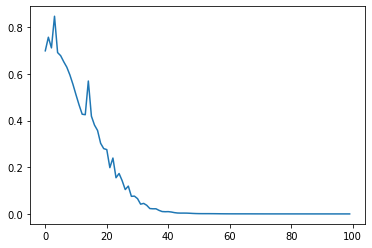

In [35]:
plt.plot(history.history['loss'])

<Figure size 432x288 with 0 Axes>

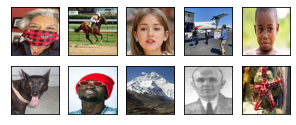

In [36]:
# 테스트 데이터로 확인
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (128,128))
    test_images.append(img)

test_images = np.array(test_images)
plot_images(2, 5, test_images)

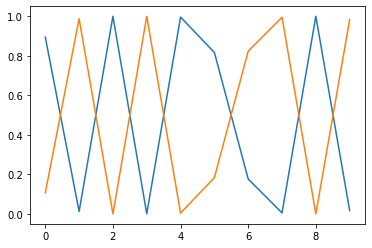

In [37]:
# 예측
test_result = model.predict(test_images)
plt.plot(test_result)

<Figure size 432x288 with 0 Axes>

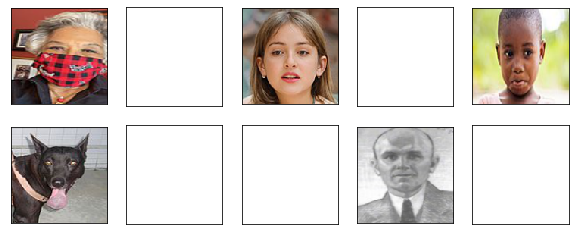

In [38]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j][0] > 0.5:
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')

fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:            
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')

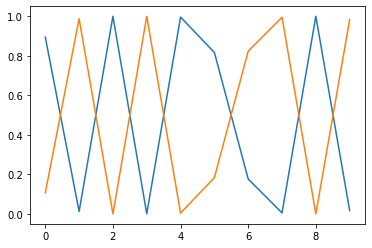

In [40]:
test_result = model.predict(test_images)
plt.plot(test_result)

ValueError: ignored

<Figure size 432x288 with 0 Axes>

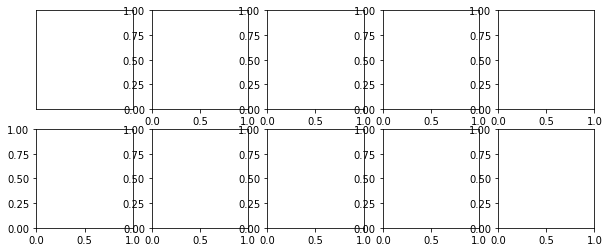

In [42]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[(i*5)+j] > 0.5:            
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')